# Lead Scoring Case Study

#### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. <br>
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. <br>
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

#### Business Problem
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. <br> The CEO, in particular, has given a ballpark of the target lead conversion rate to be around `80%.`

#### Data Analysis Goals
1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well.

## 1. Package and Data Import

In [542]:
# Importing the required packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [543]:
# Importing the data

leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 2. Inspecting the Data

In [544]:
# Shape

leads.shape

(9240, 37)

In [545]:
# Info

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Many of the variables have data missing.

In [546]:
# Description

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 3. Understanding the Data

In [547]:
# Columns 

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

`Converted` is our target variable. 1 means it was converted and 0 means it wasn't converted.

## 4. Data Cleaning

### 4.1 Check for Duplicates
Prospect ID is the unique identifier for each customers and we will use this feature to check for duplicates.

In [548]:
# Checking for duplicates

leads[leads.duplicated(subset= 'Prospect ID')]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There are no duplicates present.

### 4.2 Wrong Values

*Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value* 

There are some categorical variables that have a level called 'Select'. Very often, in forms displayed on websites, Select is the default option. And when the user submits the form without selecting anything else, the value that gets submitted is 'Select'. <br>

`Impute these values with NaN`

In [549]:
# Imputation

leads = leads.replace('Select', np.nan)

### 4.3 Missing Values

In [550]:
# Defining a function

def nan_values(df, threshold=0):
    x = round(df.isna().mean()*100, 2).sort_values(ascending=False)
    return x[x>threshold]


In [551]:
# Running the function

# Columns with more than 15% of their values missing

print("")
print('The following columns have more than 15% of their values missing:')
nan_values(leads, 15)


The following columns have more than 15% of their values missing:


How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
dtype: float64

##### How did you hear about X Education & Lead Profile
These two variables have more than 70% of their data missing. They won't help us in our analysis in anyway. Therefore, we can drop them. `Drop`

In [552]:
# Drop

drop_list = ['How did you hear about X Education', 'Lead Profile']

print(leads.shape)
leads.drop(drop_list, axis=1, inplace=True)
print(leads.shape)

(9240, 37)
(9240, 35)


#####  Lead Quality

Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead. This column has more than 50% of it's values missing.

In [553]:
# Lead Quality

leads['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [554]:
# 

leads[leads['Lead Quality'] == 'High in Relevance'].Converted.value_counts(normalize=True)*100

1    94.66248
0     5.33752
Name: Converted, dtype: float64

Close to 95% of all the leads that were categorised as 'High in Relevance' eventually converted. This could be a good feature to help classify hot leads.

In [555]:
#


leads[leads['Lead Quality'] == 'Worst'].Converted.value_counts(normalize=True)*100

0    98.003328
1     1.996672
Name: Converted, dtype: float64

98% of the leads that were categorised as 'Worst' eventually didn't convert. 

In [556]:
# 

leads['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

As we see above, we can't drop this feature as it could have some relevance in our model. As this column is based off the intuition of the employee, we can impute the value 'Not Sure' in place of missing values as it already exists in the feature.

In [557]:
# Imputation

leads['Lead Quality'].fillna('Not Sure', inplace=True)
leads['Lead Quality'].value_counts()

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

##### Asymmetrique Profile Score
An index and score assigned to each customer based on their activity and their profile

In [558]:
# Checking the dtype


leads['Asymmetrique Profile Score'].dtypes

dtype('float64')

In [559]:
# 

leads['Asymmetrique Profile Score'].describe()

count    5022.000000
mean       16.344883
std         1.811395
min        11.000000
25%        15.000000
50%        16.000000
75%        18.000000
max        20.000000
Name: Asymmetrique Profile Score, dtype: float64

In [560]:
len(leads[leads['Asymmetrique Profile Score'].isna()])

4218

In [561]:
# Checking the rows missing these values

leads[leads['Asymmetrique Profile Score'].isna() & leads['Asymmetrique Activity Score'].isna() & leads['Asymmetrique Profile Index'].isna() & leads['Asymmetrique Activity Index'].isna()].head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
963,59718980-d656-4415-baeb-c223ed6abe3a,649981,API,Organic Search,No,No,0,11.0,1166,2.20,...,No,No,NaN,NaN,NaN,NaN,NaN,No,No,Page Visited on Website
1363,a8a1c41c-a21e-43bb-9120-444d79efff06,645610,API,Direct Traffic,No,No,0,4.0,446,1.33,...,No,No,NaN,NaN,NaN,NaN,NaN,No,No,Email Opened
1388,a69a81be-f69a-45e0-9857-1f75ec740108,645388,API,Google,No,No,1,2.0,2020,2.00,...,No,No,NaN,NaN,NaN,NaN,NaN,No,No,Email Opened
1401,4e5cae69-5632-4db3-af8f-7e1b2c9b552e,645333,API,Google,No,No,1,3.0,1459,3.00,...,No,No,NaN,NaN,NaN,NaN,NaN,No,No,Email Opened
1513,14f31910-89a3-4f38-b803-dbb57999ae44,644225,API,Google,No,No,0,6.0,481,6.00,...,No,No,NaN,NaN,NaN,NaN,NaN,No,No,Modified


The rows missing values for Asymmetrique Profile Score are the same rows missing values for:
- Asymmetrique Activity Score
- Asymmetrique Profile Index  
- Asymmetrique Activity Index 

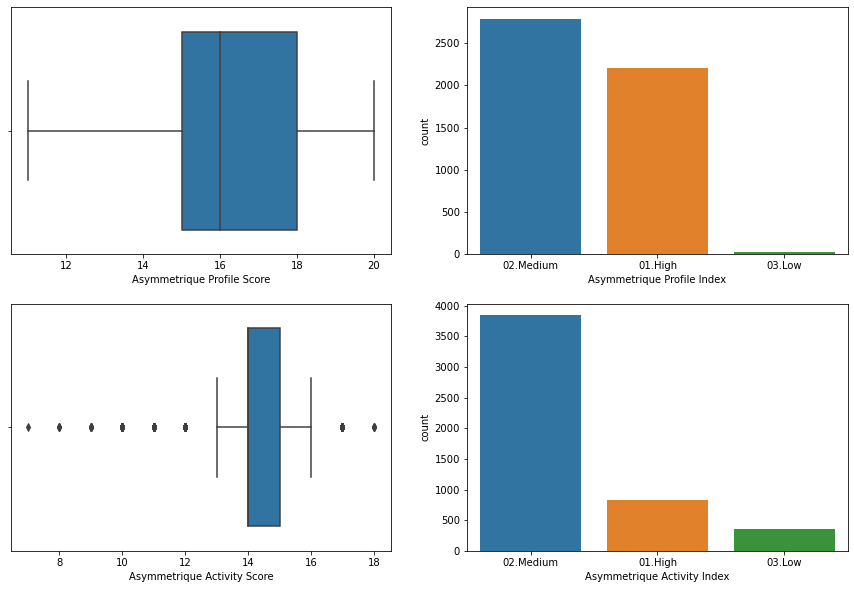

In [562]:
# Checking the distribution and variation of these features

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Variation of Asymmetrique Profile Score
sns.boxplot(leads['Asymmetrique Profile Score'], ax = axes[0,0])

# Distribution of Asymmetrique Profile Index
sns.countplot(leads['Asymmetrique Profile Index'], ax=axes[0,1])

# Variation of Asymmetrique Activity Score
sns.boxplot(leads['Asymmetrique Activity Score'], ax=axes[1, 0])

# Variation of Asymmetrique Activity Index
sns.countplot(leads['Asymmetrique Activity Index'], ax=axes[1, 1])

plt.show()

- Asymmetrique Profile Score shows a lot of variation so it would not make sense to impute any data. `Drop`
- Asymmetrique Profile Index has most values in Medium and High buckets. Imputing the mode in this case will skew that data in favour of Medium when the difference between number of Medium and High is not all that much. We won't impute the mode data. `Drop`
- Asymmetrique Activity Score has a lot of outliers present however the data does not show a lot of variation. However, imputing close to 50% of values as the median will greatly skew the data. `Drop`
- Asymmetrique Activity Index has most values in Medium and it is significantly higher than the number of observations in High. However, imputing close to 50% of the values as the mode will greatly skew the data. `Drop`

In [563]:
# Drop

drop_list = ['Asymmetrique Profile Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index']

print(leads.shape)
leads.drop(drop_list, axis=1, inplace=True)
print(leads.shape)

(9240, 35)
(9240, 31)


##### Tags
Tags assigned to customers indicating the current status of the lead. This column has more than 35% of its values missing.

In [564]:
# Distribution

leads['Tags'].value_counts(normalize=True)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

There is already a level in the column called - Will revert after reading the email. However, there is a significant distribution of leads among other categories in this feature and imputing a value could skew the data.  Therefore, `Drop`

In [565]:
# Drop

leads.drop(['Tags'], axis=1, inplace=True)
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

##### What matters most to you in choosing a course
An option selected by the customer indicating what is their main motto behind doing this course. Close to 40% of the data in this column is missing.

In [566]:
# Distribution

leads['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

Almost all the leads have selected - 'Better Career Prospects' as what matters to them the most in choosing this course. This feature brings little information because it is almost constant. Therefore, `Drop`

In [567]:
# Drop

leads.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

##### City
The city of the customer. Close to 40% of the data is missing in this column.

In [568]:
# Distribution

leads['City'].value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

Almost 60% of the leads are from Mumbai therefore we can impute this value in place of the missing values. `Impute with Mode`

In [569]:
# Imputation

leads['City'].fillna(leads['City'].mode()[0], inplace=True)
leads['City'].isna().sum()

0

##### Specialization
The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form. 

In [570]:
# Distribution 

leads['Specialization'].value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

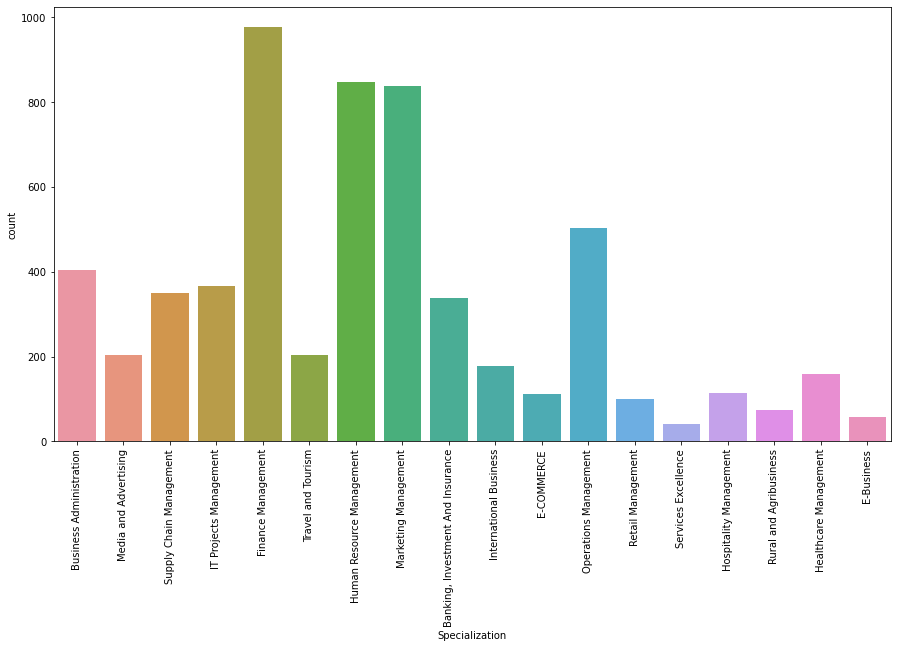

In [571]:
# Plot

plt.figure(figsize=(15, 8))
sns.countplot(leads['Specialization'])
plt.xticks(rotation=90)
plt.show()

Since these are all options that were presented to the user on a form, there is a chance that the particular Specialization of the user was not part of the options included resulting in the user not selecting anything<br>
The user may also not have selected an option if they were a student. We will therefore create a new category called 'Others'. `Create new category called 'Others'`

In [572]:
# Replacing

leads['Specialization'].replace(np.nan, 'Others', inplace=True)
leads['Specialization'].isna().sum()

0

In [573]:
nan_values(leads)

What is your current occupation    29.11
Country                            26.63
TotalVisits                         1.48
Page Views Per Visit                1.48
Last Activity                       1.11
Lead Source                         0.39
dtype: float64

##### What is your current occupation
Indicates whether the customer is a student, umemployed or employed. Almost 30% of the values in this column are missing.

In [574]:
# Distribution

leads['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

More than 85% of the leads fall under the unemployed category. This feature shows very less variation. If we impute with the mode, the variaton will reduce even further. Therefore, `Drop`

In [575]:
# Drop

leads.drop(['What is your current occupation'], axis=1, inplace=True)
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Lead Quality', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'City',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

##### Country
The country of the customer. More than 26% of the values in this column are missing.

In [576]:
# Distribution

leads['Country'].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
Canada                   0.059006
Kuwait                   0.059006
South Africa             0.059006
Germany                  0.059006
Nigeria                  0.059006
Sweden                   0.044254
Ghana                    0.029503
Netherlands              0.029503
Bangladesh               0.029503
Uganda                   0.029503
Philippines              0.029503
Belgium                  0.029503
Asia/Pacific Region      0.029503
China                    0.029503
Italy                    0.029503
Indonesia                0.014751
Kenya         

This column has almost 27% of missing values. 95% of the leads are from India. This column shows very little variation and therefore it won't add any information to our model. Therefore, `Drop`

In [577]:
# Drop

leads.drop(['Country'], axis=1, inplace=True)
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Lead Quality', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'City',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [578]:
# Columns with less than 15% of missing values

print('Columns with less than 15% of missing values')
nan_values(leads)

Columns with less than 15% of missing values


TotalVisits             1.48
Page Views Per Visit    1.48
Last Activity           1.11
Lead Source             0.39
dtype: float64

Since these columns have less than 2% missing values, we can go ahead and drop the rows that have values missing in them.

In [579]:
# Drop

leads.dropna(inplace=True)

In [580]:
# Check

nan_values(leads)

Series([], dtype: float64)

There are no more missing values.

### 4.4 Outlier Treatment

#### TotalVisits

In [581]:
# Description

leads['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

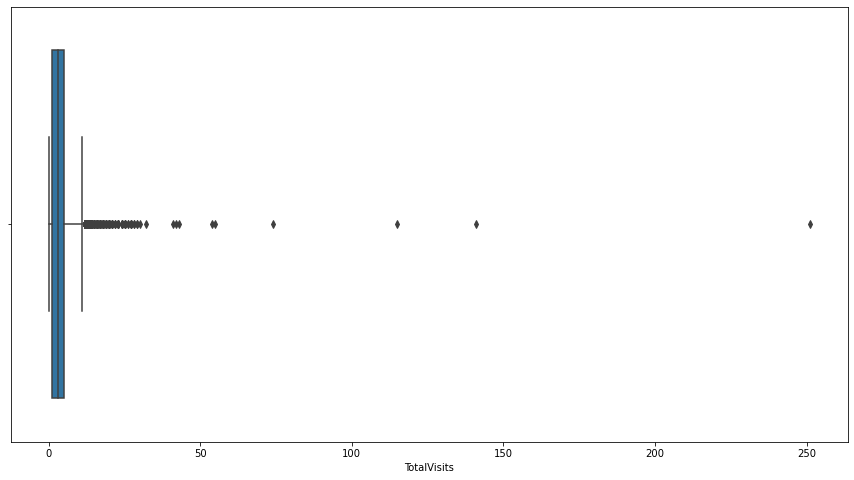

In [582]:
# Boxplot

plt.figure(figsize=(15,8))
sns.boxplot(leads['TotalVisits'])
plt.show()

This feature has significant number of outliers. We will treat this feature for outliers. We will select only values that are less than 95th quantile of the feature.

In [583]:
# Treatment

leads = leads[leads['TotalVisits'] <= leads['TotalVisits'].quantile(0.95)]

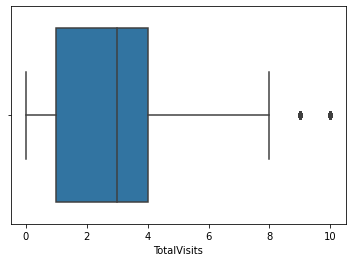

In [584]:
# Boxplot

sns.boxplot(leads['TotalVisits'])
plt.show()

#### Total Time Spent on Website

In [585]:
# Description

leads['Total Time Spent on Website'].describe()

count    8721.000000
mean      473.146887
std       542.265343
min         0.000000
25%         2.000000
50%       236.000000
75%       899.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

There is a significant difference between the mean and the median. This shows that the mean is being affected by outliers.

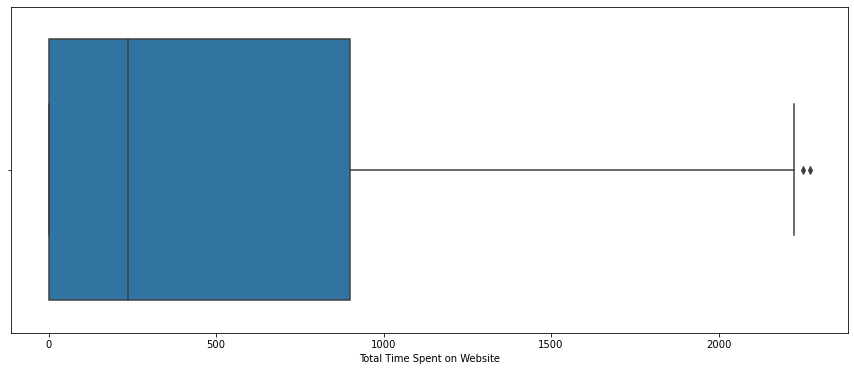

In [586]:
# Boxplot

plt.figure(figsize=(15,6))
sns.boxplot(leads['Total Time Spent on Website'])
plt.show()

We will treat the outliers. We will only select values that fall under the 90th quantile of the feature.

In [587]:
# Treatment

leads = leads[leads['Total Time Spent on Website'] <= leads['Total Time Spent on Website'].quantile(.90)]

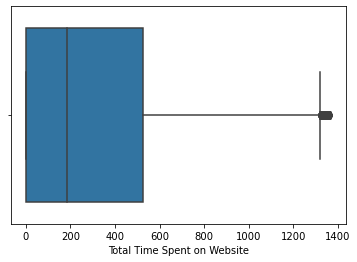

In [588]:
# Check

sns.boxplot(leads['Total Time Spent on Website'])
plt.show()

#### Page Views Per Visit

In [589]:
# Description

leads['Page Views Per Visit'].describe()

count    7851.000000
mean        2.165519
std         1.934635
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: Page Views Per Visit, dtype: float64

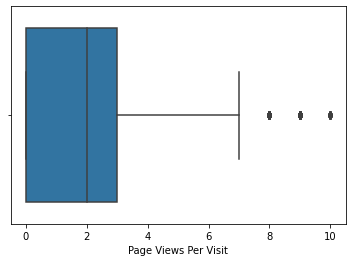

In [590]:
# Boxplot

sns.boxplot(leads['Page Views Per Visit'])
plt.show()

There is no significant difference between mean and median. The mean is not significantly affected by the presence of outliers and there are just a few outliers (statistically). However, 10 page views per visit is the max value, and this is not actually an outlier in the real sense. It is quite possible that a person would visit 10 pages on a visit. Therefore, we will not treat this column for outliers.

## 5. Exploratory Data Analysis

### 5.1 Univariate Analysis - Categorical Variables

#### 1. Target Variable - `Converted`

In [591]:
# Class Imbalance

leads['Converted'].value_counts(normalize=True)*100

0    65.826009
1    34.173991
Name: Converted, dtype: float64

In [592]:
# Class Imbalance Ratio

conv = len(leads[leads['Converted'] == 1])
nconv  = len(leads[leads['Converted'] == 0])

(conv/nconv)*100

51.91563467492261

Our data is close to a 60/40 distribution therefore it isn't severely imbalanced. We don't need to employ other methods to balance our data.

#### 2. Lead Origin

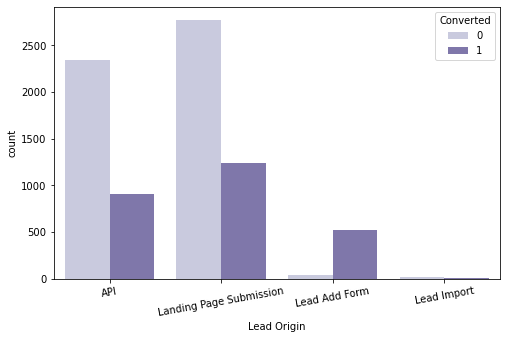

In [593]:
# Distribution

# Define a function

def my_count(column, size=(8,5), rotation=0):
    plt.figure(figsize=size)
    sns.countplot(data=leads, x=column, hue='Converted', palette='Purples')
    plt.xticks(rotation=rotation)
    plt.show()

my_count('Lead Origin', rotation=10)

In [594]:
# Conversion rates for each category

def conv_rate(column, target='Converted', df=leads):
    
    sel = df[column]
    tar = df[target]
    
    levels = list(sel.unique())
    
    print('Conversion Rates for {0}:'.format(column))
    for cat in levels:
        len_conv = len(leads[  (sel == cat) & (tar == 1)  ])
        len_total = len(leads[sel == cat])
        rate = round(len_conv/len_total*100, 2)
        
        print(' for {0} is {1}'.format(cat, rate))
        
conv_rate('Lead Origin')

Conversion Rates for Lead Origin:
 for API is 28.06
 for Landing Page Submission is 30.82
 for Lead Add Form is 93.44
 for Lead Import is 30.0


##### Observations:
1. Most of our leads are obtained through submissions on the landing page and API
2. They both have conversion rates of 30% and 28% respectively
3. Leads originating from the Lead Add Form have the highest conversion rate at 94%. However, the total count of leads originating through this channel is less. 
4. Lead Imports have the least count

#### 3. Lead Source

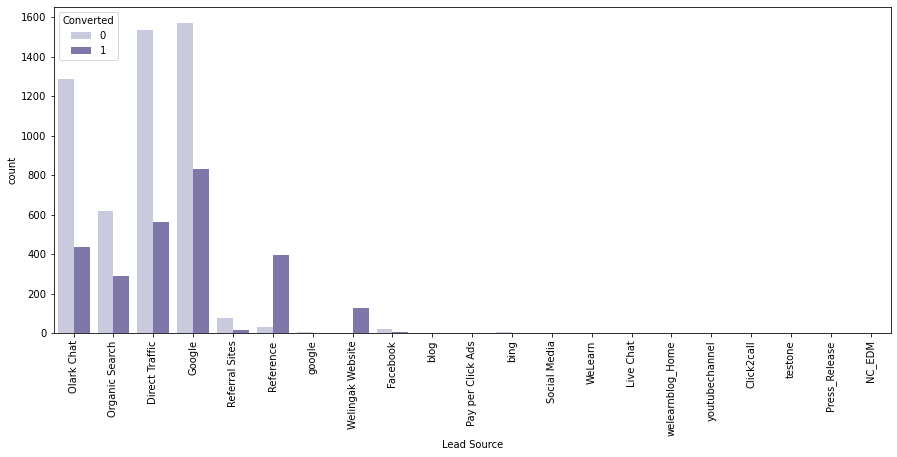

In [595]:
# Distribution

my_count('Lead Source', size=(15,6), rotation=90)

There are to levels called Google. This could have been caused because of some error during data entry. We will replace 'google' with 'Google.

In [596]:
# Replacement

leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')

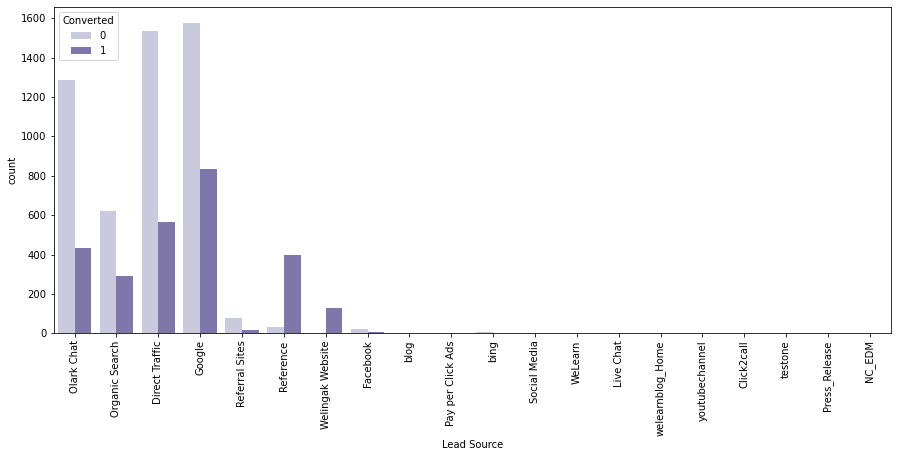

In [597]:
# Distribution

my_count('Lead Source', size=(15,6), rotation=90)

In [598]:
# Conversion Rates

conv_rate('Lead Source')

Conversion Rates for Lead Source:
 for Olark Chat is 25.25
 for Organic Search is 31.94
 for Direct Traffic is 26.92
 for Google is 34.59
 for Referral Sites is 19.39
 for Reference is 92.31
 for Welingak Website is 98.44
 for Facebook is 29.03
 for blog is 0.0
 for Pay per Click Ads is 0.0
 for bing is 16.67
 for Social Media is 50.0
 for WeLearn is 100.0
 for Live Chat is 100.0
 for welearnblog_Home is 0.0
 for youtubechannel is 0.0
 for Click2call is 66.67
 for testone is 0.0
 for Press_Release is 0.0
 for NC_EDM is 100.0


##### Observations
1. Google, Direct Traffic and Olark Chat have the highest counts. Among these Google has the highest conversion rate at 35% 
2. References are a low count but have a high conversion rate of 92%
3. Welingak Website also has a low count but high conversion rate of 98%

#### 4. Do Not Email and Do Not Call

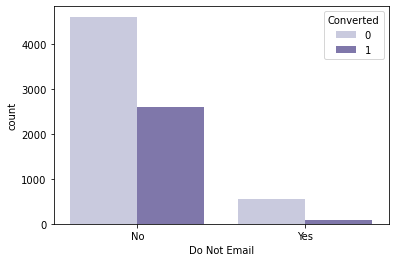

In [599]:
# Distribution - Do Not Email

my_count('Do Not Email', size=(6,4))

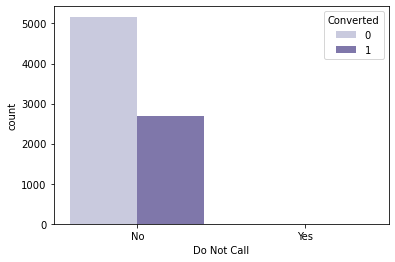

In [600]:
# Distribution - Do Not Call

my_count('Do Not Call', size=(6,4))

In [601]:
# Conversion Rates - Do Not Email

conv_rate('Do Not Email')

Conversion Rates for Do Not Email:
 for No is 36.05
 for Yes is 12.8


In [602]:
# Conversion Rates - Do Not Call

conv_rate('Do Not Call')

Conversion Rates for Do Not Call:
 for No is 34.17
 for Yes is 100.0


##### Observations
1. Majority of the leads have opted to not recieve calls or emails from the company. <br>
No clear inferences can be drawn about lead conversion from these two variables.

#### 5. Last Activity
Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.

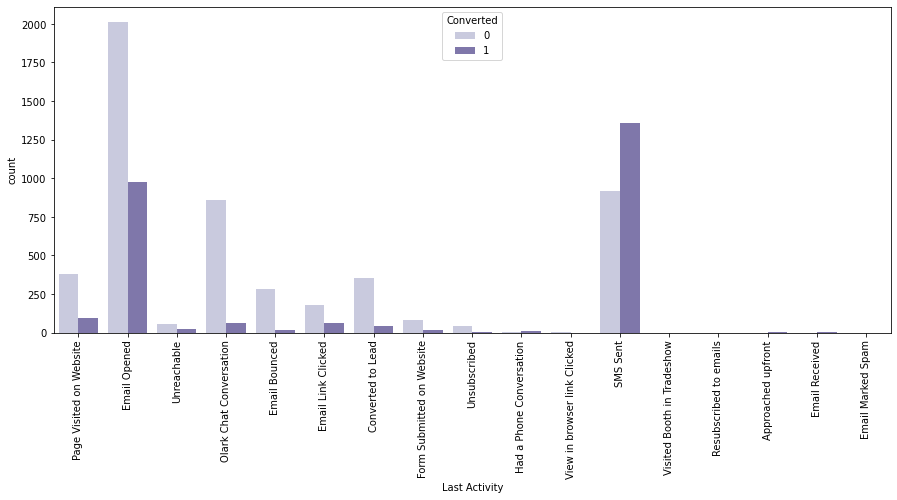

In [603]:
# Distribution

my_count('Last Activity', size=(15,6), rotation=90)

In [604]:
# Distribution

la_vc = leads['Last Activity'].value_counts(normalize=True)*100
la_vc[la_vc < 5]

Email Bounced                   3.770220
Email Link Clicked              3.031461
Form Submitted on Website       1.273723
Unreachable                     1.018978
Unsubscribed                    0.624124
Had a Phone Conversation        0.203796
View in browser link Clicked    0.063686
Approached upfront              0.038212
Email Received                  0.025474
Email Marked Spam               0.012737
Visited Booth in Tradeshow      0.012737
Resubscribed to emails          0.012737
Name: Last Activity, dtype: float64

In [605]:
# Replace all categories having less than 5% of distribution with Other

replace_list = ['Email Bounced', 'Email Link Clicked', 'Form Submitted on Website', 'Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'View in browser link Clicked', 'Approached upfront', 'Email Received', 'Visited Booth in Tradeshow', 'Resubscribed to emails', 'Email Marked Spam']

leads['Last Activity'] = leads['Last Activity'].replace(replace_list, 'Other')
leads['Last Activity'].value_counts(normalize=True)*100
    

Email Opened               38.058846
SMS Sent                   28.951726
Olark Chat Conversation    11.730990
Other                      10.087887
Page Visited on Website     6.126608
Converted to Lead           5.043943
Name: Last Activity, dtype: float64

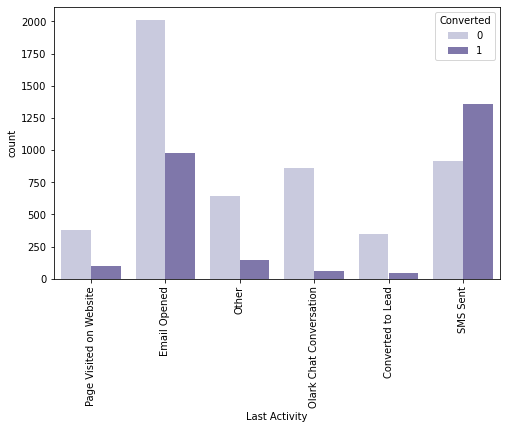

In [606]:
# Plot

my_count('Last Activity', rotation=90)

In [607]:
# Conversion Rates

conv_rate('Last Activity')

Conversion Rates for Last Activity:
 for Page Visited on Website is 20.37
 for Email Opened is 32.66
 for Other is 18.43
 for Olark Chat Conversation is 6.84
 for Converted to Lead is 11.36
 for SMS Sent is 59.61


##### Observations
1. The conversion rate for SMS sent is the highest at 60%. <br>
No clear inferences about our distribution can be drawn from this feature.

#### 6. Specialization

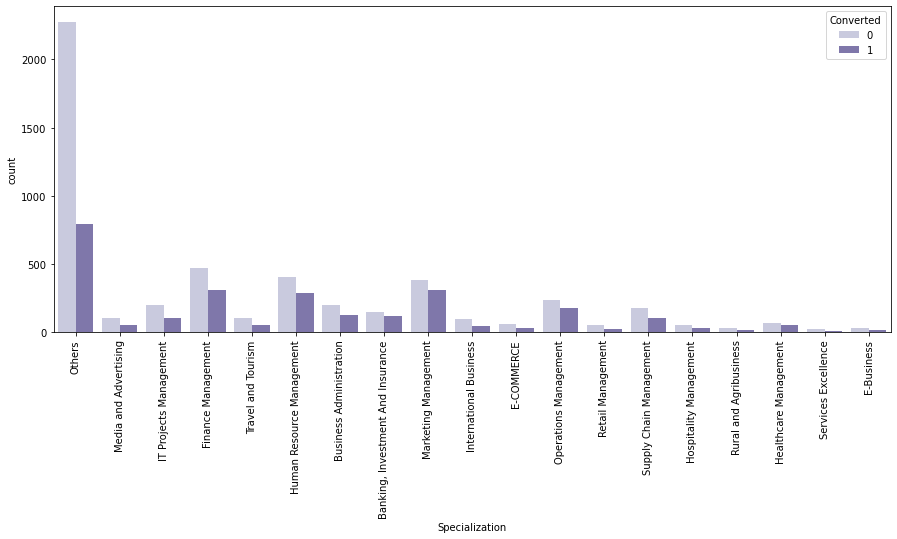

In [608]:
# Distribution

my_count('Specialization', size=(15,6), rotation=90)

In [609]:
# Conversion Rates

conv_rate('Specialization')

Conversion Rates for Specialization:
 for Others is 25.84
 for Media and Advertising is 32.7
 for IT Projects Management is 34.82
 for Finance Management is 39.34
 for Travel and Tourism is 32.5
 for Human Resource Management is 41.57
 for Business Administration is 38.92
 for Banking, Investment And Insurance is 44.36
 for Marketing Management is 45.11
 for International Business is 32.0
 for E-COMMERCE is 33.33
 for Operations Management is 42.69
 for Retail Management is 30.67
 for Supply Chain Management is 36.92
 for Hospitality Management is 35.63
 for Rural and Agribusiness is 35.19
 for Healthcare Management is 42.74
 for Services Excellence is 27.27
 for E-Business is 34.04


##### Observations
1. 'Others' has a significantly higher count as compared to other categories.
2. Conversion Rates are higher for the following categories (Above 40%) 
    - Human Resources Management
    - Marketing Management
    - Banking, Investment and Insurance
    - Operations Management
    - Healthcare Management

#### 7. Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations
Indicating whether a lead has seen an ad in any of them

In [610]:
# Value Counts

ads = ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']

for col in ads:
    print(leads[col].value_counts())
    print("")

No     7844
Yes       7
Name: Search, dtype: int64

No    7851
Name: Magazine, dtype: int64

No     7850
Yes       1
Name: Newspaper Article, dtype: int64

No    7851
Name: X Education Forums, dtype: int64

No    7851
Name: Newspaper, dtype: int64

No     7849
Yes       2
Name: Digital Advertisement, dtype: int64

No     7847
Yes       4
Name: Through Recommendations, dtype: int64



Almost none of our leads have seen any of our ads in any of the above mentioned mediums. These features will be of no use in our model.

#### 8. Receive More Updates About Our Courses

In [611]:
# Distribution

leads['Receive More Updates About Our Courses'].value_counts()

No    7851
Name: Receive More Updates About Our Courses, dtype: int64

None of the leads have opted in to receive more updates about our courses. This feature will not be of any use in our model.

#### 9. Lead Quality

In [612]:
# Distribution 

leads['Lead Quality'].value_counts(normalize=True)*100

Not Sure             65.927907
Might be             15.501210
Worst                 6.954528
Low in Relevance      5.820915
High in Relevance     5.795440
Name: Lead Quality, dtype: float64

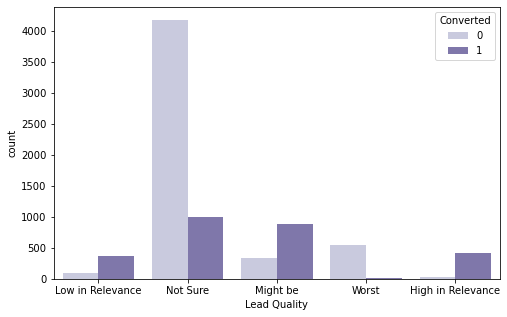

In [613]:
# Plot

my_count('Lead Quality')

In [614]:
# Conversion Rates

conv_rate('Lead Quality')

Conversion Rates for Lead Quality:
 for Low in Relevance is 80.53
 for Not Sure is 19.26
 for Might be is 72.88
 for Worst is 1.47
 for High in Relevance is 92.97


##### Observations
1. High in Relevance leads have the highest conversion rate at 93%
2. Low in Relevance leads also have a significant conversion rate at 80%
3. Not sure leads has the highest count

#### 10. Update me on Supply Chain Content

In [615]:
# Distribution

leads['Update me on Supply Chain Content'].value_counts()

No    7851
Name: Update me on Supply Chain Content, dtype: int64

All the leads have opted out of updates on Supply Chain Content. This feature will be of no use in our Model.

#### 11. Get updates on DM Content

In [616]:
# Distribution

leads['Get updates on DM Content'].value_counts()

No    7851
Name: Get updates on DM Content, dtype: int64

All the leads have opted out of updates on DM Content. This variable will be of no use in our Model.

#### 12. City

In [617]:
# Distribution

leads['City'].value_counts()

Mumbai                         5944
Thane & Outskirts               599
Other Cities                    568
Other Cities of Maharashtra     367
Other Metro Cities              314
Tier II Cities                   59
Name: City, dtype: int64

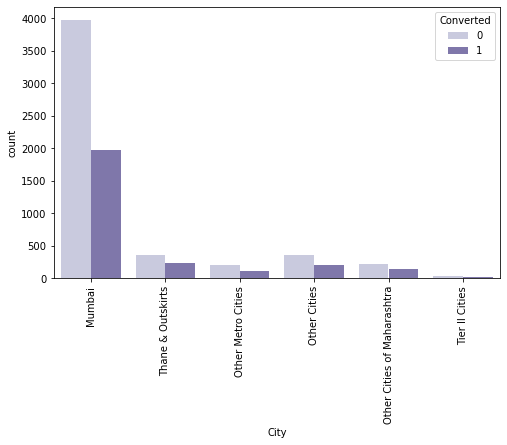

In [618]:
# Plot

my_count('City', rotation=90)

In [619]:
# Conversion Rates

conv_rate('City')

Conversion Rates for City:
 for Mumbai is 33.13
 for Thane & Outskirts is 40.07
 for Other Metro Cities is 36.31
 for Other Cities is 35.74
 for Other Cities of Maharashtra is 38.15
 for Tier II Cities is 28.81


##### Observations
1. Mumbai has the highest count of leads
2. Thane and Outskirts have the highest conversion rate at 40%

#### 13. I agree to pay the amount through cheque

In [620]:
# Distribution

leads['I agree to pay the amount through cheque'].value_counts()

No    7851
Name: I agree to pay the amount through cheque, dtype: int64

None of the leads have agreet to pay the amount through cheque. This feature will be of no use in our model.

#### 14. A free copy of Mastering The Interview

In [621]:
# Distribution

leads['A free copy of Mastering The Interview'].value_counts(normalize=True)*100

No     70.271303
Yes    29.728697
Name: A free copy of Mastering The Interview, dtype: float64

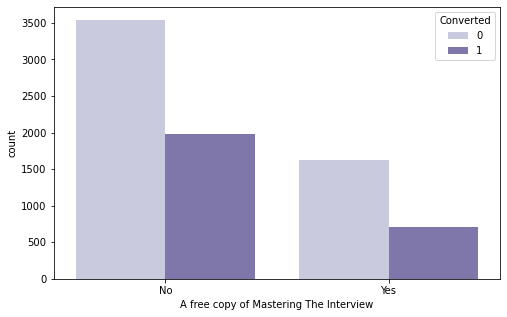

In [622]:
# Plot

my_count('A free copy of Mastering The Interview')

In [623]:
# Conversion Rates

conv_rate('A free copy of Mastering The Interview')

Conversion Rates for A free copy of Mastering The Interview:
 for No is 35.83
 for Yes is 30.25


##### Observations
1. Most of our leads have not opted for the free copy of Mastering The Interview. Conversion rate for leads who have not opted for the free copy is slightly higher than the leads who opted for it.

#### 15. Last Notable Activity

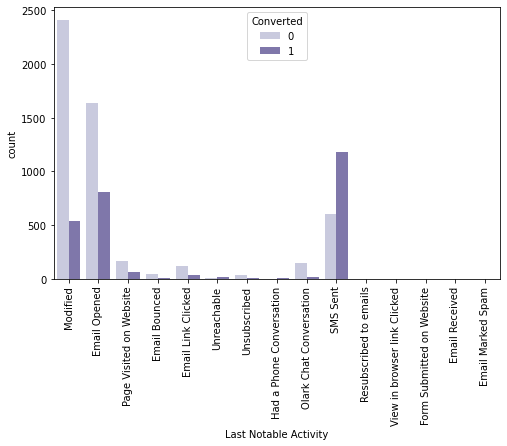

In [624]:
# Plot

my_count('Last Notable Activity', rotation=90)

This feature serves the same purpose as 'Last Activity'. Therefore this feature will not serve any additional purpose in our model.

### 5.1 Univariate Analysis - Numerical Variables

#### 1. TotalVisits

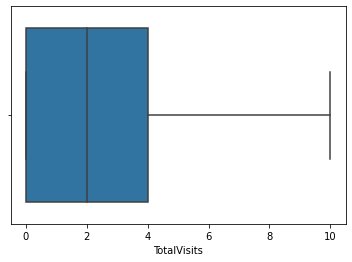

In [625]:
# Distribution

sns.boxplot(leads['TotalVisits'])
plt.show()

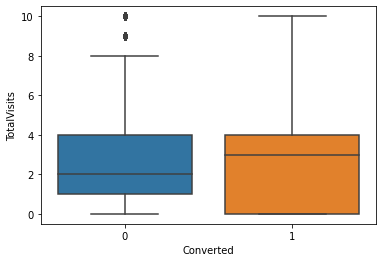

In [626]:
# Distribution between converted and not converted

sns.boxplot(data=leads, y='TotalVisits', x='Converted')
plt.show()

##### Observations:
1. The median TotalVisits for both converted and non converted leads lie between 2 and 4
2. Nothing conclusive can be derived from this feature

#### 2. Total Time Spent on Website

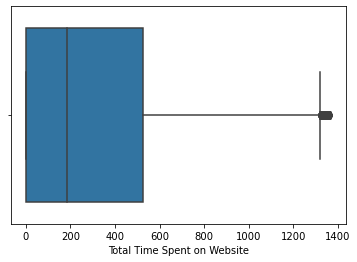

In [627]:
# Distribution

sns.boxplot(leads['Total Time Spent on Website'])
plt.show()

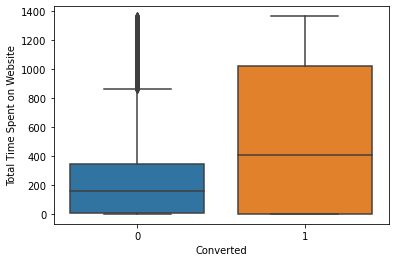

In [628]:
# Distribution between converted and non converted

sns.boxplot(data=leads, x='Converted', y='Total Time Spent on Website')
plt.show()

##### Observations:
1. There is greater variance in the time that converted leads spent on the website.
2. The median time spent by leads that converted is higher than leads that did not convert. Leads that spent more time on our site are likelier to convert.

#### 3. Page Views Per Visit

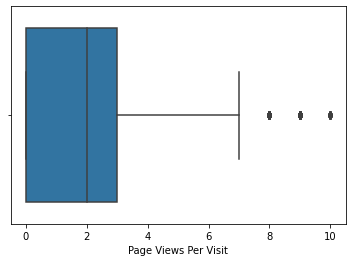

In [629]:
# Distribution

sns.boxplot(leads['Page Views Per Visit'])
plt.show()

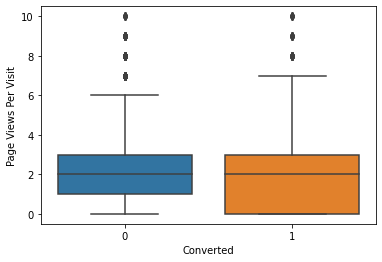

In [630]:
# Distribution between leads that converted and did not convert

sns.boxplot(data=leads, x='Converted', y='Page Views Per Visit')
plt.show()

##### Observations:
1. The median value for Page Views Per Visit is similar for both converted and non converted leads
2. Nothing conclusive can be derived from this feature.

### Results of Univariate Analysis
We have seen that many of the columns are not adding any information to our model, hence we can drop them from our model for further analysis.

In [631]:
# Drop List

drop_list = ['Lead Number', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'Last Notable Activity']

In [632]:
# Drop

print(leads.shape)
leads.drop(drop_list, axis=1, inplace=True)
print(leads.shape)

(7851, 27)
(7851, 14)


In [633]:
# Check

leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Lead Quality,City,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Low in Relevance,Mumbai,No
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Not Sure,Mumbai,No
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Other,Media and Advertising,Not Sure,Mumbai,No
5,2058ef08-2858-443e-a01f-a9237db2f5ce,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,Others,Not Sure,Mumbai,No
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,Others,Not Sure,Mumbai,No


## 6. Data Preparation

### 6.1 Converting some categorical variables to binary variables
Yes - 1 <br>
No - 0

In [634]:
# Convert

convert_list = ['Do Not Email', 'Do Not Call',  'A free copy of Mastering The Interview']

def binary_map(convert):
    return convert.map({'Yes': 1, 'No': 0})

leads[convert_list] = leads[convert_list].apply(binary_map)

### 6.2 Creating Dummy Variables

In [635]:
dum_list = [col for col in leads.columns.tolist() if leads[col].dtypes == 'object']

# So that Prospect ID is omitted
dum_list = dum_list[1:]

dum_list

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'Lead Quality',
 'City']

In [636]:
# Creating dummy df

dummy_df = pd.get_dummies(leads[dum_list], drop_first=True)

In [637]:
# Add dummy_df to leads

leads = pd.concat([leads, dummy_df], axis=1)
leads.head(2)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Specialization_Travel and Tourism,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,1,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,1,0,0,0,0,0,0


In [638]:
# Drop the variables that we have created dummy variables for

print(leads.shape)
leads.drop(dum_list, axis=1, inplace=True)
print(leads.shape)

(7851, 68)
(7851, 62)


## 7. Separate X and y

In [639]:
# Setting Y as the Target variable

y = leads['Converted']
y.head()

0    0
1    0
3    0
5    0
7    0
Name: Converted, dtype: int64

In [640]:
# Setting X as the feature variables

X = leads.drop(['Prospect ID', 'Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Specialization_Travel and Tourism,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## 8. Train-Test Split

In [641]:
# Import package required

from sklearn.model_selection import train_test_split

In [642]:
# Splitting the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 9. Feature Scaling

In [643]:
# Importing the package

from sklearn.preprocessing import StandardScaler

# Instantiate 
scaler = StandardScaler()

In [644]:
# Fit and Transform scaler on the Numerical variables

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Specialization_Travel and Tourism,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1681,0,0,-1.126777,-0.842055,-1.114806,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7851,0,0,0.898886,2.190918,0.171575,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2209,0,0,0.088620,2.442256,0.428851,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8077,0,0,-1.126777,-0.842055,-1.114806,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
7255,0,0,-1.126777,-0.842055,-1.114806,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [645]:
# Checking the current Conversion rate

leads.Converted.value_counts(normalize=True)*100

0    65.826009
1    34.173991
Name: Converted, dtype: float64

<b> We currently have a conversion rate of 34%. Our aim is to push it to around 80%. </b>

## 10. Model Building

In [646]:
# Import package

import statsmodels.api as sm

In [647]:
# Logistic Regression Model

logm0 = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
logm0.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5495
Model:                            GLM   Df Residuals:                     5436
Model Family:                Binomial   Df Model:                           58
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 14 Jul 2021   Deviance:                          nan
Time:                        18:12:47   Pearson chi2:                 5.74e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                     1.981e+15   6.19e+07    3.2e+07      0.000    1.98e+15    1.98e+15
Do Not Email                             -4.953e+14   3.85e+06  -1.29e+08      0.000   -4.95e+14   -4.95e+14
Do Not Call                               4.815e+15   6.77e+07   7.11e+07      0.000    4.81e+15    4.81e+15
TotalVisits                               1.115e+14   1.73e+06   6.44e+07      0.000    1.12e+14    1.12e+14
Total Time Spent on Website               8.733e+13   1.09e+06   7.99e+07      0.000    8.73e+13    8.73e+13
Page Views Per Visit                     -1.019e+14   1.72e+06  -5.93e+07      0.000   -1.02e+14   -1.02e+14
A free copy of Mastering The Interview     8.02e+13   3.02e+06   2.65e+07      0.000    8.02e+13    8.02e+13
Lead Origin_Landing Page Submission      -1.979e+13   3.75e+06  -5.27e+06      0.000   -1.98e+13   -1.98e+13
Lead Origin_Lead Add Form                -2.586e+14   4.77e+07  -5.42e+06      0.000   -2.59e+14   -2.59e+14
Lead Origin_Lead Import                  -8.373e+14   3.16e+07  -2.65e+07      0.000   -8.37e+14   -8.37e+14
Lead Source_Direct Traffic               -1.558e+15   6.15e+07  -2.53e+07      0.000   -1.56e+15   -1.56e+15
Lead Source_Facebook                     -8.373e+14   3.16e+07  -2.65e+07      0.000   -8.37e+14   -8.37e+14
Lead Source_Google                       -1.494e+15   6.15e+07  -2.43e+07      0.000   -1.49e+15   -1.49e+15
Lead Source_Live Chat                    -1.597e+15   7.76e+07  -2.06e+07      0.000    -1.6e+15    -1.6e+15
Lead Source_NC_EDM                        3.485e+15   9.11e+07   3.83e+07      0.000    3.48e+15    3.48e+15
Lead Source_Olark Chat                   -7.532e+14   6.15e+07  -1.22e+07      0.000   -7.53e+14   -7.53e+14
Lead Source_Organic Search               -1.578e+15   6.15e+07  -2.56e+07      0.000   -1.58e+15   -1.58e+15
Lead Source_Pay per Click Ads            -5.212e+15   9.12e+07  -5.71e+07      0.000   -5.21e+15   -5.21e+15
Lead Source_Press_Release                 5.947e+14   9.14e+07    6.5e+06      0.000    5.95e+14    5.95e+14
Lead Source_Reference                    -7.192e+14    3.9e+07  -1.84e+07      0.000   -7.19e+14   -7.19e+14
Lead Source_Referral Sites               -1.565e+15    6.2e+07  -2.52e+07      0.000   -1.56e+15   -1.56e+15
Lead Source_Social Media                  3.745e+15   9.13e+07    4.1e+07      0.000    3.74e+15    3.74e+15
Lead Source_WeLearn                        -29.0109   4.58e-07  -6.33e+07      0.000     -29.011     -29.011
Lead Source_Welingak Website              2.801e+14   3.96e+07   7.06e+06      0.000     2.8e+14     2.8e+14
Lead Source_bing                         -9.404e+14   6.84e+07  -1.37e+07      0.000    -9.4e+14    -9.4e+14
Lead Source_blog               

### 10.1 Feature Selection using RFE

In [648]:
# Import required package

# For logistic regression
from sklearn.linear_model import LogisticRegression

# Instantiate
logreg = LogisticRegression()

# For RFE 
from sklearn.feature_selection import RFE

In [649]:
# Running RFE with 15 variables as output

rfe = RFE(logreg, 20)

rfe = rfe.fit(X_train, y_train)

In [650]:
# To check the rankings

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 7),
 ('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('A free copy of Mastering The Interview', False, 27),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 25),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 32),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 12),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 30),
 ('Lead Source_Press_Release', False, 39),
 ('Lead Source_Reference', False, 9),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 14),
 ('Lead Source_WeLearn', False, 41),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 28),
 ('Lead Source_blog', False, 13),
 ('Lead Source_te

In [651]:
# Columns that were rejected

X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Live Chat',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Other',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',

In [652]:
# Columns that were selected through RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Others', 'Specialization_Services Excellence',
       'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
       'Lead Quality_Not Sure', 'Lead Quality_Worst'],
      dtype='object')

In [653]:
# Define a function to calculate VIF

# Import required package
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(train_df):
    vif = pd.DataFrame()
    vif['Features'] = train_df.columns
    vif['VIF'] = [variance_inflation_factor(train_df.values, i) for i in range(train_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    return vif

In [654]:
# The train set for first model

X_train0 = X_train[col]
X_train0.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,Specialization_Services Excellence,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
1681,0,-0.842055,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
7851,0,2.190918,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2209,0,2.442256,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8077,0,-0.842055,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
7255,0,-0.842055,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0


### Model 0 

In [655]:
# VIF values

cal_vif(X_train0)

,Features,VIF
18,Lead Quality_Not Sure,13.69
4,Lead Source_Direct Traffic,9.82
5,Lead Source_Google,9.17
2,Lead Origin_Landing Page Submission,8.19
7,Lead Source_Olark Chat,6.85
14,Specialization_Others,5.18
8,Lead Source_Organic Search,4.19
17,Lead Quality_Might be,3.52
11,Last Activity_Email Opened,3.06
13,Last Activity_SMS Sent,2.69


In [656]:
# Fitting this model

X_train_sm0 = sm.add_constant(X_train0)
logm0 = sm.GLM(y_train, X_train_sm0, family=sm.families.Binomial())

res = logm0.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5495
Model:                            GLM   Df Residuals:                     5474
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1833.6
Date:                Wed, 14 Jul 2021   Deviance:                       3667.3
Time:                        18:12:52   Pearson chi2:                 5.97e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.4931      0.544      4.583      0.000       1.427       3.559
Do Not Email                             -1.1179      0.210     -5.322      0.000      -1.530      -0.706
Total Time Spent on Website               1.0730      0.048     22.159      0.000       0.978       1.168
Lead Origin_Landing Page Submission      -0.7536      0.167     -4.507      0.000      -1.081      -0.426
Lead Origin_Lead Add Form                 2.0605      0.524      3.929      0.000       1.033       3.088
Lead Source_Direct Traffic               -0.5945      0.492     -1.208      0.227      -1.559       0.370
Lead Source_Google                       -0.4783      0.484     -0.988      0.323      -1.427       0.470
Lead Source_NC_EDM                       20.9240   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Olark Chat                    0.9645      0.482      2.003      0.045       0.021       1.908
Lead Source_Organic Search               -0.6159      0.493     -1.250      0.211      -1.582       0.350
Lead Source_Referral Sites               -0.8947      0.620     -1.443      0.149      -2.110       0.321
Lead Source_Welingak Website              3.4451      0.769      4.481      0.000       1.938       4.952
Last Activity_Email Opened                0.4338      0.130      3.340      0.001       0.179       0.688
Last Activity_Olark Chat Conversation    -0.9447      0.215     -4.402      0.000      -1.365      -0.524
Last Activity_SMS Sent                    1.7744      0.131     13.560      0.000       1.518       2.031
Specialization_Others                    -0.4514      0.153     -2.951      0.003      -0.751      -0.152
Specialization_Services Excellence       -0.7420      0.996     -0.745      0.456      -2.694       1.210
Lead Quality_Low in Relevance            -1.2660      0.298     -4.251      0.000      -1.850      -0.682
Lead Quality_Might be                    -2.0477      0.276     -7.418      0.000      -2.589      -1.507
Lead Quality_Not Sure                    -4.0419      0.267    -15.127      0.000      -4.566      -3.518
Lead Quality_Worst                       -5.9776      0.471    -12.688      0.000      -6.901      -5.054
=========================================================================================================
"""

##### Action:
'Lead Source_NC_EDM'  has the highest p value. <b>`Drop 'Lead Source_NC_EDM'`</b>

### Model 1

In [657]:
# Drop

X_train1 = X_train0.drop(['Lead Source_NC_EDM'], axis=1)
X_train1.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,Specialization_Services Excellence,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
1681,0,-0.842055,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
7851,0,2.190918,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2209,0,2.442256,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8077,0,-0.842055,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
7255,0,-0.842055,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0


In [658]:
# VIF values

cal_vif(X_train1)

,Features,VIF
17,Lead Quality_Not Sure,13.65
4,Lead Source_Direct Traffic,9.75
5,Lead Source_Google,9.11
2,Lead Origin_Landing Page Submission,8.17
6,Lead Source_Olark Chat,6.83
13,Specialization_Others,5.18
7,Lead Source_Organic Search,4.17
16,Lead Quality_Might be,3.52
10,Last Activity_Email Opened,3.05
12,Last Activity_SMS Sent,2.69


In [659]:
# Adding constant to X_train1 to get X_train_sm1

X_train_sm1 = sm.add_constant(X_train1)
X_train_sm1.head(2)

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,Specialization_Services Excellence,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
1681,1.0,0,-0.842055,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
7851,1.0,0,2.190918,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [660]:
# Fitting this model

logm1 = sm.GLM(y_train, X_train_sm1, family=sm.families.Binomial())

res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5495
Model:                            GLM   Df Residuals:                     5475
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1834.5
Date:                Wed, 14 Jul 2021   Deviance:                       3669.0
Time:                        18:12:52   Pearson chi2:                 5.98e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.6091      0.529      4.930      0.000       1.572       3.646
Do Not Email                             -1.1181      0.210     -5.323      0.000      -1.530      -0.706
Total Time Spent on Website               1.0753      0.048     22.214      0.000       0.980       1.170
Lead Origin_Landing Page Submission      -0.7447      0.167     -4.460      0.000      -1.072      -0.417
Lead Origin_Lead Add Form                 1.9439      0.507      3.832      0.000       0.950       2.938
Lead Source_Direct Traffic               -0.7238      0.471     -1.536      0.125      -1.648       0.200
Lead Source_Google                       -0.6053      0.463     -1.307      0.191      -1.513       0.303
Lead Source_Olark Chat                    0.8445      0.462      1.828      0.068      -0.061       1.750
Lead Source_Organic Search               -0.7424      0.473     -1.571      0.116      -1.669       0.184
Lead Source_Referral Sites               -1.0190      0.604     -1.686      0.092      -2.204       0.166
Lead Source_Welingak Website              3.4412      0.769      4.476      0.000       1.934       4.948
Last Activity_Email Opened                0.4352      0.130      3.352      0.001       0.181       0.690
Last Activity_Olark Chat Conversation    -0.9445      0.215     -4.400      0.000      -1.365      -0.524
Last Activity_SMS Sent                    1.7739      0.131     13.557      0.000       1.517       2.030
Specialization_Others                    -0.4491      0.153     -2.937      0.003      -0.749      -0.149
Specialization_Services Excellence       -0.7415      0.996     -0.745      0.456      -2.693       1.210
Lead Quality_Low in Relevance            -1.2634      0.298     -4.242      0.000      -1.847      -0.680
Lead Quality_Might be                    -2.0453      0.276     -7.410      0.000      -2.586      -1.504
Lead Quality_Not Sure                    -4.0382      0.267    -15.114      0.000      -4.562      -3.515
Lead Quality_Worst                       -5.9751      0.471    -12.683      0.000      -6.898      -5.052
=========================================================================================================
"""

##### Action
'Specialization_Services Excellence' has high p value. <b>`Dropping 'Specialization_Services Excellence'`</b>

### Model 2

In [661]:
# Drop

X_train2 = X_train1.drop(['Specialization_Services Excellence'], axis=1)
X_train2.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
1681,0,-0.842055,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
7851,0,2.190918,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2209,0,2.442256,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
8077,0,-0.842055,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
7255,0,-0.842055,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0


In [662]:
# VIF values

cal_vif(X_train2)

,Features,VIF
16,Lead Quality_Not Sure,13.65
4,Lead Source_Direct Traffic,9.74
5,Lead Source_Google,9.11
2,Lead Origin_Landing Page Submission,8.17
6,Lead Source_Olark Chat,6.83
13,Specialization_Others,5.17
7,Lead Source_Organic Search,4.17
15,Lead Quality_Might be,3.52
10,Last Activity_Email Opened,3.05
12,Last Activity_SMS Sent,2.68


In [663]:
# Add constant to X_train2 to get X_train_sm2

X_train_sm2 = sm.add_constant(X_train2)
X_train_sm2.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
1681,1.0,0,-0.842055,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
7851,1.0,0,2.190918,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2209,1.0,0,2.442256,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
8077,1.0,0,-0.842055,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
7255,1.0,0,-0.842055,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0


In [664]:
# Fitting the model

logm2 = sm.GLM(y_train, X_train_sm2, family=sm.families.Binomial())

res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5495
Model:                            GLM   Df Residuals:                     5476
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1834.8
Date:                Wed, 14 Jul 2021   Deviance:                       3669.6
Time:                        18:12:53   Pearson chi2:                 5.98e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.6073      0.529      4.927      0.000       1.570       3.645
Do Not Email                             -1.1246      0.210     -5.364      0.000      -1.535      -0.714
Total Time Spent on Website               1.0755      0.048     22.221      0.000       0.981       1.170
Lead Origin_Landing Page Submission      -0.7436      0.167     -4.454      0.000      -1.071      -0.416
Lead Origin_Lead Add Form                 1.9444      0.507      3.832      0.000       0.950       2.939
Lead Source_Direct Traffic               -0.7289      0.471     -1.547      0.122      -1.653       0.195
Lead Source_Google                       -0.6059      0.463     -1.308      0.191      -1.514       0.302
Lead Source_Olark Chat                    0.8443      0.462      1.828      0.068      -0.061       1.750
Lead Source_Organic Search               -0.7428      0.473     -1.572      0.116      -1.669       0.183
Lead Source_Referral Sites               -1.0214      0.604     -1.690      0.091      -2.206       0.163
Lead Source_Welingak Website              3.4414      0.769      4.476      0.000       1.934       4.948
Last Activity_Email Opened                0.4379      0.130      3.373      0.001       0.183       0.692
Last Activity_Olark Chat Conversation    -0.9445      0.215     -4.401      0.000      -1.365      -0.524
Last Activity_SMS Sent                    1.7762      0.131     13.579      0.000       1.520       2.033
Specialization_Others                    -0.4468      0.153     -2.922      0.003      -0.746      -0.147
Lead Quality_Low in Relevance            -1.2627      0.298     -4.239      0.000      -1.847      -0.679
Lead Quality_Might be                    -2.0467      0.276     -7.413      0.000      -2.588      -1.506
Lead Quality_Not Sure                    -4.0400      0.267    -15.117      0.000      -4.564      -3.516
Lead Quality_Worst                       -5.9757      0.471    -12.683      0.000      -6.899      -5.052
=========================================================================================================
"""

##### Action
'Lead Source_Google' has a high p value. <b> `Dropping 'Lead Source_Google'`</b>

### Model 3

In [665]:
# Drop

X_train3 = X_train2.drop(['Lead Source_Google'], axis=1)
X_train3.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
1681,0,-0.842055,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
7851,0,2.190918,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2209,0,2.442256,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
8077,0,-0.842055,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
7255,0,-0.842055,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0


In [666]:
# VIF values

cal_vif(X_train3)

,Features,VIF
15,Lead Quality_Not Sure,8.37
2,Lead Origin_Landing Page Submission,6.45
12,Specialization_Others,4.57
9,Last Activity_Email Opened,2.75
5,Lead Source_Olark Chat,2.63
11,Last Activity_SMS Sent,2.51
14,Lead Quality_Might be,2.46
4,Lead Source_Direct Traffic,2.28
10,Last Activity_Olark Chat Conversation,1.90
3,Lead Origin_Lead Add Form,1.80


In [667]:
# Add constant to X_train3 to get X_train_sm3

X_train_sm3 = sm.add_constant(X_train3)
X_train_sm3.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
1681,1.0,0,-0.842055,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
7851,1.0,0,2.190918,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2209,1.0,0,2.442256,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
8077,1.0,0,-0.842055,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
7255,1.0,0,-0.842055,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0


In [668]:
# Fitting the Model

logm3 = sm.GLM(y_train, X_train_sm3, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5495
Model:                            GLM   Df Residuals:                     5477
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1835.6
Date:                Wed, 14 Jul 2021   Deviance:                       3671.3
Time:                        18:12:53   Pearson chi2:                 5.97e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.0455      0.306      6.687      0.000       1.446       2.645
Do Not Email                             -1.1235      0.210     -5.360      0.000      -1.534      -0.713
Total Time Spent on Website               1.0695      0.048     22.227      0.000       0.975       1.164
Lead Origin_Landing Page Submission      -0.7697      0.166     -4.642      0.000      -1.095      -0.445
Lead Origin_Lead Add Form                 2.5078      0.272      9.219      0.000       1.975       3.041
Lead Source_Direct Traffic               -0.1317      0.119     -1.104      0.270      -0.365       0.102
Lead Source_Olark Chat                    1.4184      0.151      9.389      0.000       1.122       1.714
Lead Source_Organic Search               -0.1512      0.140     -1.081      0.280      -0.425       0.123
Lead Source_Referral Sites               -0.4350      0.406     -1.071      0.284      -1.231       0.361
Lead Source_Welingak Website              3.4540      0.769      4.492      0.000       1.947       4.961
Last Activity_Email Opened                0.4439      0.130      3.422      0.001       0.190       0.698
Last Activity_Olark Chat Conversation    -0.9396      0.214     -4.384      0.000      -1.360      -0.520
Last Activity_SMS Sent                    1.7779      0.131     13.592      0.000       1.522       2.034
Specialization_Others                    -0.4605      0.153     -3.016      0.003      -0.760      -0.161
Lead Quality_Low in Relevance            -1.2781      0.298     -4.294      0.000      -1.862      -0.695
Lead Quality_Might be                    -2.0567      0.276     -7.450      0.000      -2.598      -1.516
Lead Quality_Not Sure                    -4.0495      0.267    -15.154      0.000      -4.573      -3.526
Lead Quality_Worst                       -5.9876      0.471    -12.708      0.000      -6.911      -5.064
=========================================================================================================
"""

##### Action
'Lead Source_Referral Sites' has a high p-value. <b>`Dropping 'Lead Source_Referral Sites'` </b>

### Model 4

In [669]:
# Drop

X_train4 = X_train3.drop(['Lead Source_Referral Sites'], axis=1)
X_train4.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
1681,0,-0.842055,0,0,0,1,0,0,0,0,0,1,0,0,1,0
7851,0,2.190918,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2209,0,2.442256,1,0,1,0,0,0,0,0,0,0,0,0,0,1
8077,0,-0.842055,0,1,0,0,0,0,0,0,1,0,0,1,0,0
7255,0,-0.842055,0,0,0,1,0,0,1,0,0,1,0,0,1,0


In [670]:
# VIF values

cal_vif(X_train4)

,Features,VIF
14,Lead Quality_Not Sure,8.32
2,Lead Origin_Landing Page Submission,6.44
11,Specialization_Others,4.55
8,Last Activity_Email Opened,2.75
5,Lead Source_Olark Chat,2.58
10,Last Activity_SMS Sent,2.51
13,Lead Quality_Might be,2.45
4,Lead Source_Direct Traffic,2.27
9,Last Activity_Olark Chat Conversation,1.90
3,Lead Origin_Lead Add Form,1.79


In [671]:
# Adding constant to X_train4 to get X_train_sm4

X_train_sm4 = sm.add_constant(X_train4)
X_train_sm4.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
1681,1.0,0,-0.842055,0,0,0,1,0,0,0,0,0,1,0,0,1,0
7851,1.0,0,2.190918,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2209,1.0,0,2.442256,1,0,1,0,0,0,0,0,0,0,0,0,0,1
8077,1.0,0,-0.842055,0,1,0,0,0,0,0,0,1,0,0,1,0,0
7255,1.0,0,-0.842055,0,0,0,1,0,0,1,0,0,1,0,0,1,0


In [672]:
# Fitting the model

logm4 = sm.GLM(y_train, X_train_sm4, family=sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5495
Model:                            GLM   Df Residuals:                     5478
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1836.2
Date:                Wed, 14 Jul 2021   Deviance:                       3672.4
Time:                        18:12:54   Pearson chi2:                 5.98e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.0165      0.305      6.609      0.000       1.418       2.614
Do Not Email                             -1.1248      0.209     -5.369      0.000      -1.535      -0.714
Total Time Spent on Website               1.0697      0.048     22.238      0.000       0.975       1.164
Lead Origin_Landing Page Submission      -0.7574      0.166     -4.576      0.000      -1.082      -0.433
Lead Origin_Lead Add Form                 2.5301      0.271      9.325      0.000       1.998       3.062
Lead Source_Direct Traffic               -0.1229      0.119     -1.032      0.302      -0.356       0.111
Lead Source_Olark Chat                    1.4427      0.150      9.645      0.000       1.150       1.736
Lead Source_Organic Search               -0.1357      0.139     -0.975      0.329      -0.408       0.137
Lead Source_Welingak Website              3.4566      0.769      4.495      0.000       1.949       4.964
Last Activity_Email Opened                0.4489      0.130      3.461      0.001       0.195       0.703
Last Activity_Olark Chat Conversation    -0.9343      0.214     -4.361      0.000      -1.354      -0.514
Last Activity_SMS Sent                    1.7862      0.131     13.668      0.000       1.530       2.042
Specialization_Others                    -0.4648      0.153     -3.045      0.002      -0.764      -0.166
Lead Quality_Low in Relevance            -1.2792      0.298     -4.297      0.000      -1.863      -0.696
Lead Quality_Might be                    -2.0533      0.276     -7.437      0.000      -2.594      -1.512
Lead Quality_Not Sure                    -4.0463      0.267    -15.144      0.000      -4.570      -3.523
Lead Quality_Worst                       -5.9809      0.471    -12.697      0.000      -6.904      -5.058
=========================================================================================================
"""

##### Action:
'Lead Source_Organic Search' has a high p-value. <b>` Dropping 'Lead Source_Organic Search' `</b>

### Model 5

In [673]:
# Drop

X_train5 = X_train4.drop(['Lead Source_Organic Search'], axis=1)
X_train5.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
1681,0,-0.842055,0,0,0,1,0,0,0,0,1,0,0,1,0
7851,0,2.190918,1,0,0,0,0,0,0,0,0,0,1,0,0
2209,0,2.442256,1,0,1,0,0,0,0,0,0,0,0,0,1
8077,0,-0.842055,0,1,0,0,0,0,0,1,0,0,1,0,0
7255,0,-0.842055,0,0,0,1,0,1,0,0,1,0,0,1,0


In [674]:
# VIF values

cal_vif(X_train5)

,Features,VIF
13,Lead Quality_Not Sure,8.15
2,Lead Origin_Landing Page Submission,6.38
10,Specialization_Others,4.53
7,Last Activity_Email Opened,2.75
9,Last Activity_SMS Sent,2.50
5,Lead Source_Olark Chat,2.46
12,Lead Quality_Might be,2.42
4,Lead Source_Direct Traffic,2.02
8,Last Activity_Olark Chat Conversation,1.90
3,Lead Origin_Lead Add Form,1.78


In [675]:
# Adding constant to X_train5 to get X_train_sm5

X_train_sm5 = sm.add_constant(X_train5)
X_train_sm5.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
1681,1.0,0,-0.842055,0,0,0,1,0,0,0,0,1,0,0,1,0
7851,1.0,0,2.190918,1,0,0,0,0,0,0,0,0,0,1,0,0
2209,1.0,0,2.442256,1,0,1,0,0,0,0,0,0,0,0,0,1
8077,1.0,0,-0.842055,0,1,0,0,0,0,0,1,0,0,1,0,0
7255,1.0,0,-0.842055,0,0,0,1,0,1,0,0,1,0,0,1,0


In [676]:
# Fitting the Model

logm5 = sm.GLM(y_train, X_train_sm5, family=sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5495
Model:                            GLM   Df Residuals:                     5479
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1836.7
Date:                Wed, 14 Jul 2021   Deviance:                       3673.4
Time:                        18:12:54   Pearson chi2:                 5.98e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.9841      0.303      6.545      0.000       1.390       2.578
Do Not Email                             -1.1285      0.209     -5.390      0.000      -1.539      -0.718
Total Time Spent on Website               1.0691      0.048     22.234      0.000       0.975       1.163
Lead Origin_Landing Page Submission      -0.7555      0.166     -4.563      0.000      -1.080      -0.431
Lead Origin_Lead Add Form                 2.5681      0.269      9.559      0.000       2.042       3.095
Lead Source_Direct Traffic               -0.0883      0.114     -0.776      0.438      -0.311       0.135
Lead Source_Olark Chat                    1.4801      0.145     10.213      0.000       1.196       1.764
Lead Source_Welingak Website              3.4576      0.769      4.496      0.000       1.950       4.965
Last Activity_Email Opened                0.4502      0.130      3.472      0.001       0.196       0.704
Last Activity_Olark Chat Conversation    -0.9317      0.214     -4.351      0.000      -1.351      -0.512
Last Activity_SMS Sent                    1.7825      0.131     13.650      0.000       1.527       2.038
Specialization_Others                    -0.4690      0.153     -3.072      0.002      -0.768      -0.170
Lead Quality_Low in Relevance            -1.2826      0.298     -4.310      0.000      -1.866      -0.699
Lead Quality_Might be                    -2.0569      0.276     -7.452      0.000      -2.598      -1.516
Lead Quality_Not Sure                    -4.0479      0.267    -15.153      0.000      -4.572      -3.524
Lead Quality_Worst                       -5.9819      0.471    -12.706      0.000      -6.905      -5.059
=========================================================================================================
"""

##### Action:
'Lead Source_Direct Traffic' has high p-value. <b> `Dropping 'Lead Source_Direct Traffic' `</b>

### Model 6

In [677]:
# Drop

X_train6 = X_train5.drop(['Lead Source_Direct Traffic'], axis=1)
X_train6.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
1681,0,-0.842055,0,0,1,0,0,0,0,1,0,0,1,0
7851,0,2.190918,1,0,0,0,0,0,0,0,0,1,0,0
2209,0,2.442256,1,0,0,0,0,0,0,0,0,0,0,1
8077,0,-0.842055,0,1,0,0,0,0,1,0,0,1,0,0
7255,0,-0.842055,0,0,1,0,1,0,0,1,0,0,1,0


In [678]:
# VIF values

cal_vif(X_train6)

,Features,VIF
12,Lead Quality_Not Sure,8.14
2,Lead Origin_Landing Page Submission,5.57
9,Specialization_Others,4.53
6,Last Activity_Email Opened,2.75
8,Last Activity_SMS Sent,2.50
4,Lead Source_Olark Chat,2.46
11,Lead Quality_Might be,2.42
7,Last Activity_Olark Chat Conversation,1.90
3,Lead Origin_Lead Add Form,1.78
13,Lead Quality_Worst,1.73


In [679]:
# Adding a constant to X_train6 to get X_train_sm6

X_train_sm6 = sm.add_constant(X_train6)
X_train_sm6.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
1681,1.0,0,-0.842055,0,0,1,0,0,0,0,1,0,0,1,0
7851,1.0,0,2.190918,1,0,0,0,0,0,0,0,0,1,0,0
2209,1.0,0,2.442256,1,0,0,0,0,0,0,0,0,0,0,1
8077,1.0,0,-0.842055,0,1,0,0,0,0,1,0,0,1,0,0
7255,1.0,0,-0.842055,0,0,1,0,1,0,0,1,0,0,1,0


In [680]:
# Fitting the Model

logm6 = sm.GLM(y_train, X_train_sm6, family=sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5495
Model:                            GLM   Df Residuals:                     5480
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1837.0
Date:                Wed, 14 Jul 2021   Deviance:                       3674.0
Time:                        18:12:55   Pearson chi2:                 5.94e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.9827      0.303      6.539      0.000       1.388       2.577
Do Not Email                             -1.1336      0.209     -5.419      0.000      -1.544      -0.724
Total Time Spent on Website               1.0704      0.048     22.274      0.000       0.976       1.165
Lead Origin_Landing Page Submission      -0.7935      0.158     -5.018      0.000      -1.103      -0.484
Lead Origin_Lead Add Form                 2.5737      0.269      9.581      0.000       2.047       3.100
Lead Source_Olark Chat                    1.4865      0.145     10.271      0.000       1.203       1.770
Lead Source_Welingak Website              3.4591      0.769      4.498      0.000       1.952       4.966
Last Activity_Email Opened                0.4491      0.130      3.465      0.001       0.195       0.703
Last Activity_Olark Chat Conversation    -0.9344      0.214     -4.364      0.000      -1.354      -0.515
Last Activity_SMS Sent                    1.7820      0.131     13.648      0.000       1.526       2.038
Specialization_Others                    -0.4690      0.153     -3.073      0.002      -0.768      -0.170
Lead Quality_Low in Relevance            -1.2821      0.298     -4.307      0.000      -1.865      -0.699
Lead Quality_Might be                    -2.0587      0.276     -7.457      0.000      -2.600      -1.518
Lead Quality_Not Sure                    -4.0508      0.267    -15.160      0.000      -4.575      -3.527
Lead Quality_Worst                       -5.9935      0.470    -12.739      0.000      -6.916      -5.071
=========================================================================================================
"""

##### Action

The p-values are acceptable but 'Lead Quality_Not Sure' has a high VIF value. <b>`Dropping 'Lead Quality_Not Sure'`</b>

### Model 7

In [681]:
# Drop

X_train7 = X_train6.drop(['Lead Quality_Not Sure'], axis=1)
X_train7.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Worst
1681,0,-0.842055,0,0,1,0,0,0,0,1,0,0,0
7851,0,2.190918,1,0,0,0,0,0,0,0,0,1,0
2209,0,2.442256,1,0,0,0,0,0,0,0,0,0,1
8077,0,-0.842055,0,1,0,0,0,0,1,0,0,1,0
7255,0,-0.842055,0,0,1,0,1,0,0,1,0,0,0


In [682]:
# VIF values

cal_vif(X_train7)

,Features,VIF
2,Lead Origin_Landing Page Submission,2.76
9,Specialization_Others,2.58
6,Last Activity_Email Opened,2.50
4,Lead Source_Olark Chat,2.39
8,Last Activity_SMS Sent,2.33
7,Last Activity_Olark Chat Conversation,1.82
3,Lead Origin_Lead Add Form,1.76
11,Lead Quality_Might be,1.39
1,Total Time Spent on Website,1.37
5,Lead Source_Welingak Website,1.34


In [683]:
# Adding constant to X_train7 to get X_train_sm7

X_train_sm7 = sm.add_constant(X_train7)
X_train_sm7.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Worst
1681,1.0,0,-0.842055,0,0,1,0,0,0,0,1,0,0,0
7851,1.0,0,2.190918,1,0,0,0,0,0,0,0,0,1,0
2209,1.0,0,2.442256,1,0,0,0,0,0,0,0,0,0,1
8077,1.0,0,-0.842055,0,1,0,0,0,0,1,0,0,1,0
7255,1.0,0,-0.842055,0,0,1,0,1,0,0,1,0,0,0


In [684]:
# Fitting the Model

logm7 = sm.GLM(y_train, X_train_sm7, family=sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5495
Model:                            GLM   Df Residuals:                     5481
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2048.3
Date:                Wed, 14 Jul 2021   Deviance:                       4096.5
Time:                        18:12:55   Pearson chi2:                 5.96e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2955      0.168     -7.692      0.000      -1.626      -0.965
Do Not Email                             -1.2769      0.205     -6.217      0.000      -1.679      -0.874
Total Time Spent on Website               1.0566      0.045     23.429      0.000       0.968       1.145
Lead Origin_Landing Page Submission      -1.1088      0.147     -7.529      0.000      -1.397      -0.820
Lead Origin_Lead Add Form                 3.4599      0.256     13.496      0.000       2.957       3.962
Lead Source_Olark Chat                    1.4211      0.137     10.363      0.000       1.152       1.690
Lead Source_Welingak Website              2.4621      0.765      3.220      0.001       0.963       3.961
Last Activity_Email Opened                0.5210      0.119      4.381      0.000       0.288       0.754
Last Activity_Olark Chat Conversation    -0.9825      0.205     -4.798      0.000      -1.384      -0.581
Last Activity_SMS Sent                    1.6588      0.121     13.685      0.000       1.421       1.896
Specialization_Others                    -1.0718      0.141     -7.619      0.000      -1.348      -0.796
Lead Quality_Low in Relevance             2.2295      0.165     13.524      0.000       1.906       2.553
Lead Quality_Might be                     1.5762      0.110     14.376      0.000       1.361       1.791
Lead Quality_Worst                       -2.3558      0.399     -5.903      0.000      -3.138      -1.574
=========================================================================================================
"""

##### Result
The p-values and VIF values are all withing the accpetable range. <b>`logm7 is our final model`</b>

In [685]:
# Predicting the values on the train set

y_train_pred = res.predict(X_train_sm7)
y_train_pred[:10]

1681    0.137539
7851    0.815598
2209    0.101587
8077    0.989118
7255    0.211671
8676    0.209561
8747    0.211671
1107    0.230302
3082    0.095168
8183    0.642149
dtype: float64

In [686]:
# Reshaping

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.13753919, 0.81559817, 0.10158676, 0.98911764, 0.2116705 ,
       0.20956051, 0.2116705 , 0.23030212, 0.09516799, 0.64214944])

In [687]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted Prob': y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted Prob,Prospect ID
0,0,0.137539,1681
1,1,0.815598,7851
2,0,0.101587,2209
3,1,0.989118,8077
4,0,0.211671,7255


<b>Here, we have the Target variables - 'Converted' from our training set and the 'Converted Prob' variable which we have calculated.</b>

In [688]:
# Creating a new column - 'Predicted' where value is 1 if Converted Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final['Converted Prob'].map(lambda x: 1 if x>0.5 else 0 )

y_train_pred_final.head()

,Converted,Converted Prob,Prospect ID,Predicted
0,0,0.137539,1681,0
1,1,0.815598,7851,1
2,0,0.101587,2209,0
3,1,0.989118,8077,1
4,0,0.211671,7255,0


<b>We have set the initital cutoff as 0.5 to have some reference for comparison. We will further find the optimal cutoff value.</b>

## 11. Model Evaluation

In [689]:
from sklearn import metrics

# To get confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3290  321]
 [ 586 1298]]


|| Not Converted | Converted | 
| --- | --- | --- |
| Not Converted | 3290  | 321 |
| Converted | 586     | 1298 |

### 11.1 Accuracy

In [690]:
# Checking overall accuracy

acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
acc*100

83.4940855323021

We have 83% accuracy. However, accuracy by itself is not a good enough metric for our Business Problem. We are more concerned with how many leads we correctly identified as 'Converted' because we do not want to miss out any of the hot leads. To analyse this, we can use other metrics such as Recall and Precision.

In [691]:
# Define different variables

TP = confusion[1,1] # True Positives
TN = confusion[0,0] # True Negatives
FP = confusion[0,1] # False Positives
FN = confusion[1,0] # False Negatives

### 11.2 Sensitivity (True Positive Rate/Recall)
Tells us what proportion of converted leads were correctly classified. 

In [692]:
# Calculation

(TP/(TP+FN))

0.6889596602972399

### 11.3 False Positive Rate
Tells us what proportion of not converted leads that were incorrectly classified as converted.

In [693]:
# Calculation

(FP/(TN+FP))

0.08889504292439768

### 11.4 Specificity (True Negative Rate)
Probability that the leads that did not convert were predicted as not converted.

In [694]:
# Calculation

(TN/(TN+FP))

0.9111049570756024

### 11.5 Precision (Positive Predicted Value)
Probabilty that a predicted Conversion is an actual Conversion.

In [695]:
# Calculation

(TP/(TP+FP))

0.8017294626312539

### 11.6 Negative Predicted Value
Probability that a predicted not conversion is actually a not conversion

In [696]:
# Calculation

(TN / (TN+ FN))

0.848813209494324

#### Inference:
Our current model has a decent Recall/Sensitivity of 0.69 and Precision of 0.80. However, we can plot the ROC curve and check whether we can obtain better results by selecting the optimal cutoff value.

## 12. Plotting ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [697]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [698]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final['Converted Prob'], drop_intermediate = False )

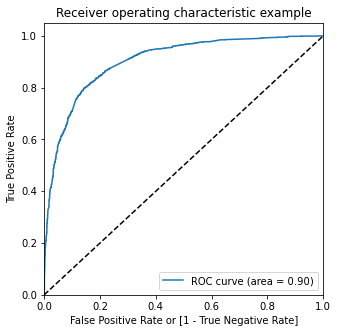

In [699]:
# Plot

draw_roc(y_train_pred_final.Converted, y_train_pred_final['Converted Prob'])

The area under the curve is 0.90. An excellent model has AUC near to the 1 which means it has a good measure of separability. A poor model has an AUC near 0 which means it has the worst measure of separability.

## 13. Finding Optimal Cutoff point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [700]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.137539,1681,0,1,1,0,0,0,0,0,0,0,0
1,1,0.815598,7851,1,1,1,1,1,1,1,1,1,1,0
2,0,0.101587,2209,0,1,1,0,0,0,0,0,0,0,0
3,1,0.989118,8077,1,1,1,1,1,1,1,1,1,1,1
4,0,0.211671,7255,0,1,1,1,0,0,0,0,0,0,0


In [701]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.342857  1.000000  0.000000
0.1   0.1  0.676251  0.962314  0.527001
0.2   0.2  0.766333  0.914544  0.689006
0.3   0.3  0.822748  0.827495  0.820271
0.4   0.4  0.838217  0.782909  0.867073
0.5   0.5  0.834941  0.688960  0.911105
0.6   0.6  0.827298  0.621550  0.934644
0.7   0.7  0.816015  0.546178  0.956799
0.8   0.8  0.789445  0.440552  0.971476
0.9   0.9  0.747771  0.285032  0.989200


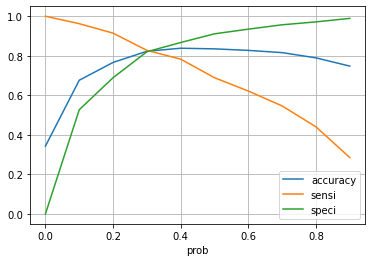

In [702]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid()
plt.show()

##### Inference

From the curve, <b>`0.3`</b> is the optimum point to take it as a cutoff point.

In [703]:
# Prediction based on new cutoff point

y_train_pred_final['Final Predicted'] = y_train_pred_final['Converted Prob'].map(lambda x: 1 if x>0.3 else 0)
y_train_pred_final.head()

,Converted,Converted Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final Predicted
0,0,0.137539,1681,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.815598,7851,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.101587,2209,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.989118,8077,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.211671,7255,0,1,1,1,0,0,0,0,0,0,0,0


## 14. Re-evaluating The Model

In [704]:
# To get confusion matrix

confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final['Final Predicted'])
print(confusion1)

[[2962  649]
 [ 325 1559]]


In [705]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

### 14.1 Accuracy

In [706]:
# Calculation

acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final['Final Predicted'])
acc

0.8227479526842584

### 14.2 Sensitivity (True Positive Rate)

In [707]:
# Calculation

(TP/(TP+FN))

0.8274946921443737

### 14.3 Specificity

In [708]:
# Calculation

(TN/(TN+FP))

0.8202713929659374

### 14.4 False Positive Rate

In [709]:
# Calculation

(FP/(TN+FP))

0.1797286070340626

### 14.5 Precision 

In [710]:
# Calculation

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_pred_final.Converted , y_train_pred_final['Final Predicted'])

0.7060688405797102

### 14.6 Recall

In [711]:
# Calculation

recall_score(y_train_pred_final.Converted , y_train_pred_final['Final Predicted'])

0.8274946921443737

##### Inference

- The new model with the optimal cutoff has a higher sensitivity of 0.82 as compared to the former's 0.69
- The precision for the new model is lower as compared to the former. 

## 15. Precision and Recall Tradeoff

In [712]:
# Importing required packages

from sklearn.metrics import precision_recall_curve

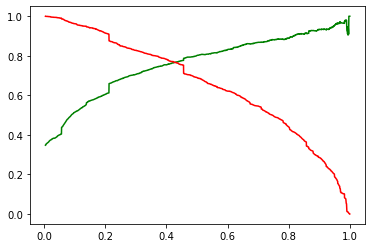

In [713]:


p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final['Converted Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## 16. Making Predictions on the Test Set

In [714]:
# Checking X_test

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Specialization_Travel and Tourism,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
8723,0,0,2.0,228,2.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7546,0,0,9.0,846,9.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3853,0,0,2.0,334,2.0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4305,0,0,6.0,373,6.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8749,0,0,1.0,145,1.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [715]:
# Transform X_test

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
8723,-0.316512,-0.291045,-0.085701
7546,2.519416,1.202483,3.516164
3853,-0.316512,-0.034874,-0.085701
4305,1.304018,0.059378,1.972507
8749,-0.721645,-0.491632,-0.600253
...,...,...,...
4110,-1.126777,-0.842055,-1.114806
4887,0.088620,0.264799,0.428851
6773,-1.126777,-0.842055,-1.114806
4204,1.709151,-0.677719,2.487060


In [716]:
# Selecting only the features from our Model

cols = X_train7.columns.tolist()
X_test = X_test[cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Worst
8723,0,-0.291045,0,0,0,0,1,0,0,1,0,0,0
7546,0,1.202483,1,0,0,0,0,0,1,0,0,0,0
3853,0,-0.034874,1,0,0,0,1,0,0,0,0,0,0
4305,0,0.059378,1,0,0,0,0,0,1,0,0,0,0
8749,0,-0.491632,0,1,0,0,1,0,0,0,0,0,0


In [717]:
# Adding a constant to X_test to get X_test_sm

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Worst
8723,1.0,0,-0.291045,0,0,0,0,1,0,0,1,0,0,0
7546,1.0,0,1.202483,1,0,0,0,0,0,1,0,0,0,0
3853,1.0,0,-0.034874,1,0,0,0,1,0,0,0,0,0,0
4305,1.0,0,0.059378,1,0,0,0,0,0,1,0,0,0,0
8749,1.0,0,-0.491632,0,1,0,0,1,0,0,0,0,0,0


In [718]:
# Making predictions on the test set

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

8723    0.103973
7546    0.628310
3853    0.127844
4305    0.335637
8749    0.897145
1060    0.455838
90      0.062352
8389    0.044331
8902    0.985576
6322    0.130848
dtype: float64

In [719]:
# y_test_pred is an array. Converting it to a dataframe.

y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df.head()

,0
8723,0.103973
7546,0.628310
3853,0.127844
4305,0.335637
8749,0.897145


In [720]:
# Checking y_test

y_test.head()

8723    0
7546    1
3853    0
4305    1
8749    1
Name: Converted, dtype: int64

In [721]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
8723,0
7546,1
3853,0
4305,1
8749,1


In [722]:
# Adding Prospect ID to index

y_test_df['Prospect ID'] = y_test_df.index
y_test_df.head()

,Converted,Prospect ID
8723,0,8723
7546,1,7546
3853,0,3853
4305,1,4305
8749,1,8749


In [723]:
# Removing index for both dataframes to append them side by side 

y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [724]:
# Appending y_test_df and y_test_pred_df

y_pred_final = pd.concat([y_test_df, y_test_pred_df], axis=1)
                         

In [725]:
# Check

y_pred_final.head()

,Converted,Prospect ID,0
0,0,8723,0.103973
1,1,7546,0.628310
2,0,3853,0.127844
3,1,4305,0.335637
4,1,8749,0.897145


In [726]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted Prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted Prob
0,0,8723,0.103973
1,1,7546,0.628310
2,0,3853,0.127844
3,1,4305,0.335637
4,1,8749,0.897145


In [727]:
# Making final prediciton

y_pred_final['Final Predicted'] = y_pred_final['Converted Prob'].map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Converted,Prospect ID,Converted Prob,Final Predicted
0,0,8723,0.103973,0
1,1,7546,0.628310,1
2,0,3853,0.127844,0
3,1,4305,0.335637,1
4,1,8749,0.897145,1


## 17. Evaluation

### 17.1 Accuracy

In [735]:
# Calculation

metrics.accuracy_score(y_pred_final.Converted, y_pred_final['Final Predicted'])

0.8208828522920204

In [729]:
# Confusion Matrix

confusion_final = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final['Final Predicted'])
confusion_final

array([[1266,  291],
       [ 131,  668]], dtype=int64)

In [730]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

### 17.2 Sensitivity

In [731]:
# Calculation

(TP/(TP+FN))*100

83.60450563204004

### 17.3 Specificity

In [732]:
# Calculation

(TN/(TN+FP))*100

81.31021194605009

### 17.4 Precision

In [737]:
# Calculation

precision_score(y_pred_final.Converted , y_pred_final['Final Predicted'])

0.6965589155370178

### 17.5 Recall

In [738]:
# Calculation

recall_score(y_pred_final.Converted , y_pred_final['Final Predicted'])

0.8360450563204005

## 18. Assigning Lead Score

In [733]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final Predicted,Lead_Score
0,0,0.137539,1681,0,1,1,0,0,0,0,0,0,0,0,0,14
1,1,0.815598,7851,1,1,1,1,1,1,1,1,1,1,0,1,82
2,0,0.101587,2209,0,1,1,0,0,0,0,0,0,0,0,0,10
3,1,0.989118,8077,1,1,1,1,1,1,1,1,1,1,1,1,99
4,0,0.211671,7255,0,1,1,1,0,0,0,0,0,0,0,0,21


## 19. Conclusion

### Important Variables

In [734]:
# Features and their coeffecients

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5495
Model:                            GLM   Df Residuals:                     5481
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2048.3
Date:                Wed, 14 Jul 2021   Deviance:                       4096.5
Time:                        18:13:01   Pearson chi2:                 5.96e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2955      0.168     -7.692      0.000      -1.626      -0.965
Do Not Email                             -1.2769      0.205     -6.217      0.000      -1.679      -0.874
Total Time Spent on Website               1.0566      0.045     23.429      0.000       0.968       1.145
Lead Origin_Landing Page Submission      -1.1088      0.147     -7.529      0.000      -1.397      -0.820
Lead Origin_Lead Add Form                 3.4599      0.256     13.496      0.000       2.957       3.962
Lead Source_Olark Chat                    1.4211      0.137     10.363      0.000       1.152       1.690
Lead Source_Welingak Website              2.4621      0.765      3.220      0.001       0.963       3.961
Last Activity_Email Opened                0.5210      0.119      4.381      0.000       0.288       0.754
Last Activity_Olark Chat Conversation    -0.9825      0.205     -4.798      0.000      -1.384      -0.581
Last Activity_SMS Sent                    1.6588      0.121     13.685      0.000       1.421       1.896
Specialization_Others                    -1.0718      0.141     -7.619      0.000      -1.348      -0.796
Lead Quality_Low in Relevance             2.2295      0.165     13.524      0.000       1.906       2.553
Lead Quality_Might be                     1.5762      0.110     14.376      0.000       1.361       1.791
Lead Quality_Worst                       -2.3558      0.399     -5.903      0.000      -3.138      -1.574
=========================================================================================================
"""

The variables that matter the most when selecting hot leads are the following:
- The lead origin being the Lead Add Form has a positive influence on the Lead Score
- The lead source being the Welingak Website has a positive influence on the Lead Score
- The lead quality being low in relevance has a positive influence on the Lead Score
- The last activity of the lead being sending an sms has a positive influence on the Lead Score
<br> <br>
- The lead quality being worst has a negative influence on the Lead Score
- The lead opting out of Emails has a negative influence on the Lead Score
- The lead origin being the Landing Page Submission has a negative influence on the Lead Score 